In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy
from sympy import *
import pickle
import datetime

In [32]:
files = [
    'outputs/20240214_205519_n2.0.pickle',
    'outputs/20240214_213130_n2.5.pickle',
    'outputs/20240214_212403_n3.0.pickle',
    #'outputs/20240214_211950_n4.0.pickle'
]

results = []
for file in files:
    with open(file, 'rb') as f:
        results.append(pickle.load(f))

### Velocity vs depth profile at end

<lambdifygenerated-33>:2: RuntimeWarning: invalid value encountered in power
  return 5.35792667531285e-6 - 1.66156291593578e-6*(1 - 0.000353540252182347*z)**3.5


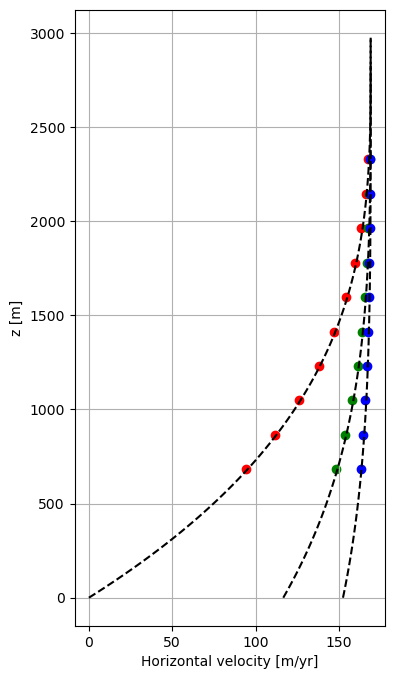

In [35]:
# Plot each layer solution at x=100e3 as a function of depth
fig, ax = plt.subplots(figsize=(4, 8))

plot_pos_x = 100e3

result_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for result_idx, res in enumerate(results):
    u_at_plot_pos = sympy.lambdify(res['z'], res['u'].subs(res['x'], plot_pos_x), modules='numpy')(res['zs'])

    for layer_idx in res['layer_solutions'].keys():
        if (layer_idx == 1):
            lbl = f'ODE Solutions for n = {res["n"]}'
        else:
            lbl = None
        ax.scatter([res['layer_solutions'][layer_idx].sol(plot_pos_x)], [res['layers_t0'][layer_idx](plot_pos_x)], label=lbl, c=result_colors[result_idx])

    ax.plot(u_at_plot_pos*scipy.constants.year, res['zs'], 'k--', label=f'n = {res["n"]}')

ax.set_xlabel('Horizontal velocity [m/yr]')
ax.set_ylabel('z [m]')
#ax.legend()
ax.grid()
plt.show()

### Stress vs strain

/tmp/ipykernel_382214/3520865325.py:4: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(res['eff_stress']), np.log10(res['du_dz_central_diff']), label=f'n = {res["n"]}', s=2, c=result_colors[result_idx])


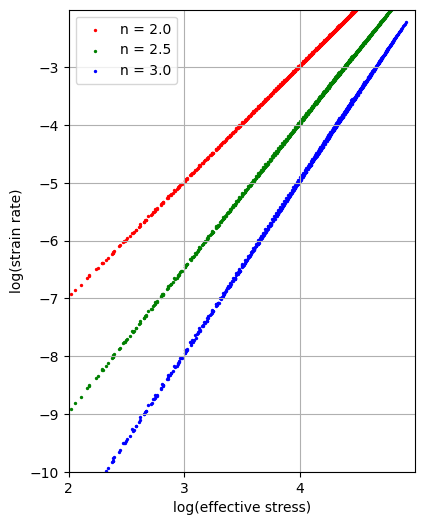

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

for result_idx, res in enumerate(results):
    ax.scatter(np.log10(res['eff_stress']), np.log10(res['du_dz_central_diff']), label=f'n = {res["n"]}', s=2, c=result_colors[result_idx])

ax.set_aspect(0.5)
ax.set_xlabel('log(effective stress)')
ax.set_ylabel('log(strain rate)')
ax.legend()
# Set the grid spacing to 1 on both axes
ax.set_xticks(np.arange(2, 5, 1))
ax.set_yticks(np.arange(-10, -2, 1))
ax.set_ylim(-10, -2)
ax.set_xlim(2, 5)
ax.grid()

In [76]:
import rasterio
import matplotlib.pyplot as plt

# Specify the path to the geotiff file
geotiff_path = 'data/ANT_G0240_0000_v.tif'

# Open the geotiff file
with rasterio.open(geotiff_path) as src:
    # Read the raster data
    raster_data = src.read(1)

    # Read units from file
    units = src.units

    # Get the spatial transform to convert pixel coordinates to georeferenced coordinates
    transform = src.transform

    # Get the x and y coordinates corresponding to each pixel
    x = transform[2] + transform[0] * np.arange(raster_data.shape[1])
    y = transform[5] + transform[4] * np.arange(raster_data.shape[0])
    


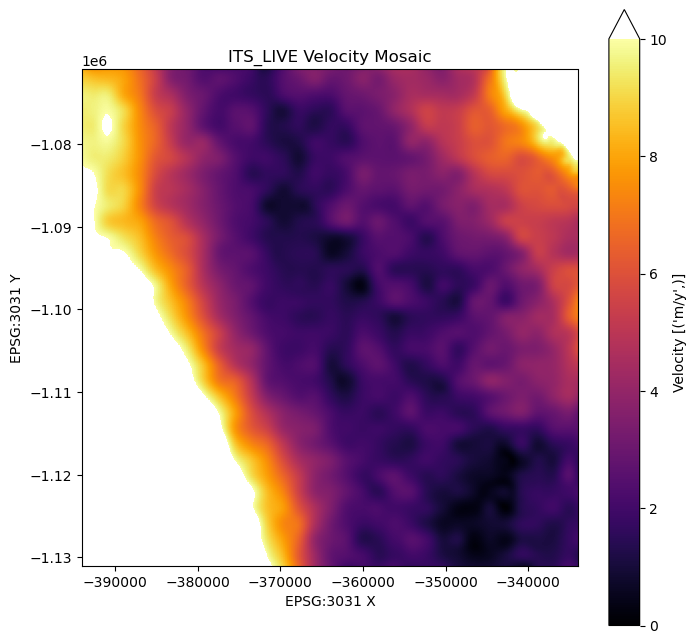

In [78]:
center_x, center_y = -364e3, -1101e3

half_side = 30e3  # Adjust this value to change the size of the area

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the geotiff data
ims = ax.imshow(raster_data, extent=[x.min(), x.max(), y.min(), y.max()], cmap='inferno', vmin=0, vmax=10)
ims.cmap.set_extremes(over='white')
fig.colorbar(ims, ax=ax, label=f'Velocity [{units}]', extend='max')

ax.set_xlim(center_x - half_side, center_x + half_side)
ax.set_ylim(center_y - half_side, center_y + half_side)

# Set the x and y axis labels
ax.set_xlabel('EPSG:3031 X')
ax.set_ylabel('EPSG:3031 Y')

# Set the title of the plot
ax.set_title('ITS_LIVE Velocity Mosaic')

# Show the plot
plt.show()

